In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras

In [ ]:
from keras.datasets import mnist

def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test  = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3]


In [ ]:
print(np.amax(X_train))
print(np.amin(X_train))

255
0


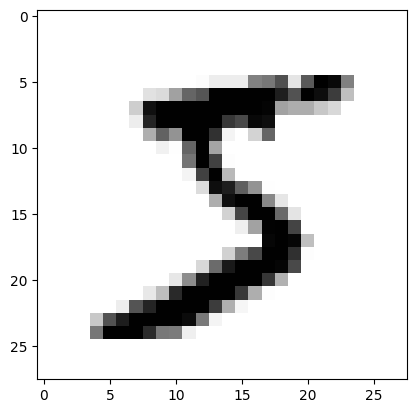

Label of image is 5


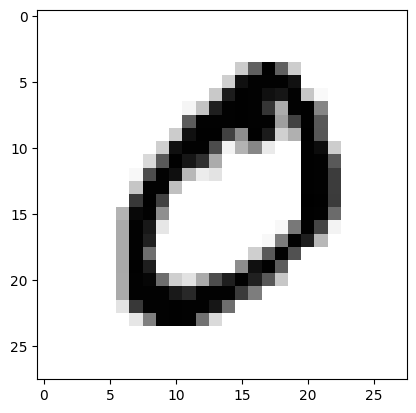

Label of image is 0


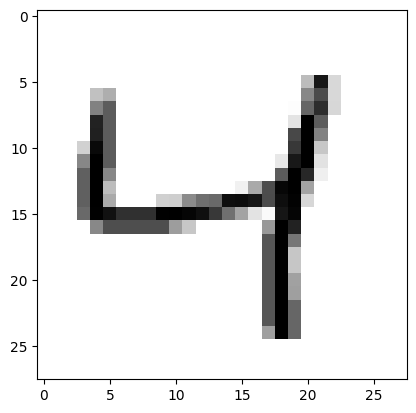

Label of image is 4


In [ ]:
for i in range(0,3):
  pixels=X_train[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", y_train[i])

In [ ]:
def convert_dtype(x):

    x_float=x.astype('float32')
    return x_float

X_train = convert_dtype(X_train)
X_test = convert_dtype(X_test)

In [ ]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
# to check if train_samples is normalized or not
np.isclose(np.amax(X_train), 1)

True

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):

    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

X_train = reshape(X_train)
X_test = reshape(X_test)

In [ ]:
def oneHot(y, Ny):

    import tensorflow
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
y_train = oneHot(y_train, 10)
y_test = oneHot(y_test, 10)

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
model = Sequential([
Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Flatten(),
Dense(units=128, activation='relu'),
Dense(units=10, activation='softmax'),
])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(),
            metrics=["acc"])

In [ ]:
results = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 79s 322ms/step - loss: 0.2990 - acc: 0.9109 - val_loss: 0.0857 - val_acc: 0.9722
Epoch 2/10
235/235 [==============================] - 75s 320ms/step - loss: 0.0798 - acc: 0.9758 - val_loss: 0.0470 - val_acc: 0.9852
Epoch 3/10
235/235 [==============================] - 78s 332ms/step - loss: 0.0596 - acc: 0.9814 - val_loss: 0.0382 - val_acc: 0.9880
Epoch 4/10
235/235 [==============================] - 76s 323ms/step - loss: 0.0464 - acc: 0.9860 - val_loss: 0.0392 - val_acc: 0.9868
Epoch 5/10
235/235 [==============================] - 83s 352ms/step - loss: 0.0378 - acc: 0.9887 - val_loss: 0.0284 - val_acc: 0.9905
Epoch 6/10
235/235 [==============================] - 76s 324ms/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0298 - val_acc: 0.9903
Epoch 7/10
235/235 [==============================] - 73s 311ms/step - loss: 0.0297 - acc: 0.9905 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 8/10
235/235 [==============================] - 7

In [ ]:
import pickle

pickle.dump(model, open('model.pth', 'wb'))

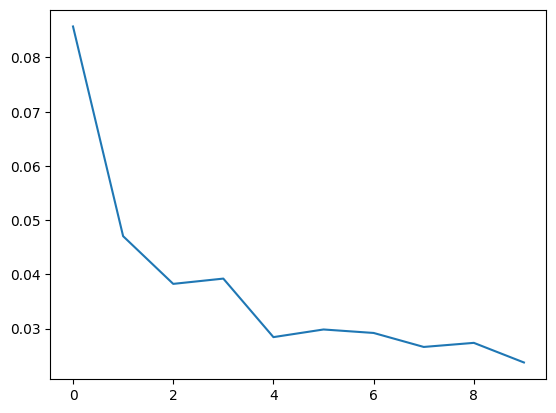

In [ ]:
results.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(results.history['val_loss'])), results.history['val_loss'])
plt.show()

In [ ]:
def predict(x):
    y = model.predict(x)
    return y

predicted_labels_train = predict(X_train)

1875/1875 [==============================] - 33s 17ms/step


In [ ]:
def oneHot_tolabel(y):
    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b

In [ ]:
def create_confusion_matrix(true_labels, predicted_labels):

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels.argmax(axis=1), predicted_labels.argmax(axis=1))
    return cm

cm = create_confusion_matrix((y_train), (predict(X_train)))
print(cm)

1875/1875 [==============================] - 25s 13ms/step
[[5918    0    0    0    0    0    3    0    2    0]
 [   0 6725    2    0    0    0    0   15    0    0]
 [   0    2 5944    0    0    0    0    5    6    1]
 [   2    0    0 6107    0    8    0    4    6    4]
 [   0    1    0    0 5831    0    1    1    0    8]
 [   0    1    0    2    0 5411    5    0    1    1]
 [   1    0    1    0    1    2 5912    0    1    0]
 [   0    2    1    0    1    0    0 6259    0    2]
 [   0    1    1    0    1    1    5    1 5835    6]
 [   3    1    0    0   11    0    0    6    7 5921]]


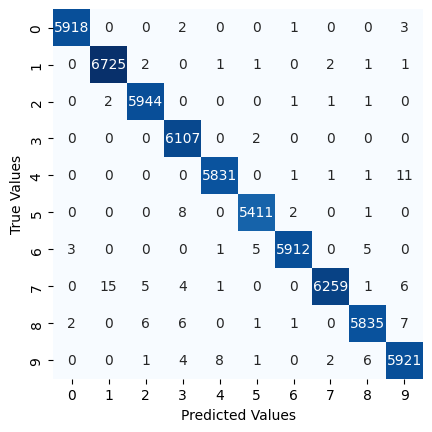

In [ ]:
# Plot Confusion matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
!pip install Streamlit -q

In [ ]:
!pip install streamlit-drawable-canvas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
import requests

def get_public_ip():
    response = requests.get('https://api.ipify.org')
    return response.text

public_ip = get_public_ip()
print(f"Public IP Address: {public_ip}")

Public IP Address: 35.201.244.160


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.201.244.160:8501

npx: installed 22 in 5.595s
your url is: https://red-planes-stand.loca.lt
2024-03-23 12:10:52.202 MediaFileHandler: Missing file 8bebc42e31b980e9033653c5d73c176b78d0e5f8d52776935f471d4a.png
  Stopping...
^C
